Import Libraries and Load Data

In [4]:
import pandas as pd
from scipy.io import arff

# Load the ARFF file (replace 'TimeBasedFeatures-Dataset-15s-VPN copy.arff' with the actual path)
arff_file_path = 'TimeBasedFeatures-Dataset-15s-VPN.arff'
data, meta = arff.loadarff(arff_file_path)

# Convert to DataFrame
df = pd.DataFrame(data)

# Inspect the first few rows of the dataset
df.head()


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,b'Non-VPN'
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,b'Non-VPN'
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,b'Non-VPN'
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,b'Non-VPN'
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,b'Non-VPN'


2: Decode Byte Strings and Inspect Data

In [5]:
# Decode the 'class1' column from byte strings to regular strings
df['class1'] = df['class1'].apply(lambda x: x.decode('utf-8'))

# Inspect the first few rows to ensure decoding
df.head()


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle,class1
0,9368711.0,16.0,4.0,1564818.0,1549373.0,190205.285714,203290.456522,389822.391917,370323.719754,10.353612,...,267600.198443,1871488.0,1.983656e+06,2195089.0,1.832197e+05,1234883.0,1420565.0,1523088.0,161096.539275,Non-VPN
1,7340238.0,18.0,4.0,1567554.0,1527893.0,165686.977273,186914.846154,317267.548742,304370.651301,11.580006,...,221462.862028,1491627.0,3.572433e+06,5653239.0,2.942704e+06,1131498.0,1324636.0,1517774.0,273138.379008,Non-VPN
2,4644225.0,29.0,15.0,1270547.0,1079974.0,165865.178571,195302.130435,329473.126261,300492.588227,11.412022,...,217475.425246,1758922.0,1.758922e+06,1758922.0,0.000000e+00,1079974.0,1079974.0,1079974.0,0.000000,Non-VPN
3,4978735.0,19.0,8.0,2492050.0,2457286.0,239543.250000,276596.388889,612435.304238,628339.573544,8.034169,...,436959.716436,1710925.0,2.382905e+06,3054885.0,9.503232e+05,1346073.0,1894031.5,2441990.0,774930.342317,Non-VPN
4,11838189.0,19.0,10.0,3094089.0,3093543.0,243766.500000,295954.725000,599721.781709,625632.703972,7.602514,...,436129.639296,1747431.0,2.400446e+06,3240696.0,6.232744e+05,1394455.0,1983227.0,3042717.0,725987.829075,Non-VPN


3: Check and Handle Missing Values

In [7]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (if any)
#df.fillna(df.mean(), inplace=True)

# Verify that there are no missing values
#print(df.isnull().sum())


duration              0
total_fiat            0
total_biat            0
min_fiat              0
min_biat              0
max_fiat              0
max_biat              0
mean_fiat             0
mean_biat             0
flowPktsPerSecond     0
flowBytesPerSecond    0
min_flowiat           0
max_flowiat           0
mean_flowiat          0
std_flowiat           0
min_active            0
mean_active           0
max_active            0
std_active            0
min_idle              0
mean_idle             0
max_idle              0
std_idle              0
class1                0
dtype: int64


4: Normalize Features

In [8]:
from sklearn.preprocessing import StandardScaler

# Select features and target
features = df.drop('class1', axis=1)
target = df['class1']

# Normalize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Convert back to DataFrame for easier manipulation
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

# Verify normalization
features_scaled_df.describe()


,duration,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,flowPktsPerSecond,...,mean_flowiat,std_flowiat,min_active,mean_active,max_active,std_active,min_idle,mean_idle,max_idle,std_idle
count,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,...,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,1.875800e+04,18758.000000,1.875800e+04,1.875800e+04
mean,-5.454641e-17,3.333392e-17,2.424285e-17,-7.575890e-18,1.515178e-17,-7.575890e-18,-8.484997e-17,-2.727320e-17,-3.030356e-18,-1.060625e-17,...,-9.848657e-18,-3.560668e-17,2.121249e-17,2.424285e-17,-1.515178e-17,-1.515178e-18,1.212142e-17,0.000000,1.515178e-17,5.151605e-17
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,...,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027,1.000027e+00,1.000027e+00
min,-6.807266e-01,-2.713520e-01,-2.694234e-01,-3.120465e-01,-2.964802e-01,-3.195423e-01,-3.693331e-01,-1.948206e-01,-2.437512e-01,-1.084885e-01,...,-3.395187e-01,-2.928772e-01,-2.422966e-01,-2.680912e-01,-2.921927e-01,-1.785788e-01,-2.236215e-01,-0.246783,-2.685000e-01,-1.626778e-01
25%,-6.574601e-01,-2.713484e-01,-2.694221e-01,-3.096012e-01,-2.939374e-01,-3.158682e-01,-3.670787e-01,-1.947942e-01,-2.437512e-01,-1.083525e-01,...,-3.326990e-01,-2.912997e-01,-2.422966e-01,-2.680912e-01,-2.921927e-01,-1.785788e-01,-2.236215e-01,-0.246783,-2.685000e-01,-1.626778e-01
50%,9.044101e-02,-2.713239e-01,-2.694139e-01,-2.854814e-01,-2.667898e-01,-3.032937e-01,-3.552050e-01,-1.921343e-01,-2.399337e-01,-1.078774e-01,...,-2.796165e-01,-2.716033e-01,-2.422966e-01,-2.680912e-01,-2.921927e-01,-1.785788e-01,-2.236215e-01,-0.246783,-2.685000e-01,-1.626778e-01
75%,3.582867e-01,-2.706182e-01,-2.687133e-01,9.182404e-02,1.454315e-01,-1.521112e-01,-1.752672e-01,-5.516840e-02,-3.152243e-02,-1.032219e-01,...,-1.174060e-01,-7.614732e-02,-3.619871e-02,4.519183e-02,1.142286e-01,-1.785788e-01,-7.793095e-02,0.000597,6.931328e-02,-1.626778e-01
max,4.112939e+01,1.652691e+01,1.821525e+01,2.827279e+01,6.187620e+01,4.806081e+01,1.685880e+01,4.938498e+01,3.870189e+01,5.220589e+01,...,4.288208e+01,3.819053e+01,4.454111e+01,4.404933e+01,4.265997e+01,5.952537e+01,4.475242e+01,44.283605,4.290120e+01,6.014969e+01


5: Split the Data

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled_df, target, test_size=0.3, random_state=42)

# Verify the split
print(f'Training set size: {X_train.shape[0]}')
print(f'Testing set size: {X_test.shape[0]}')


Training set size: 13130
Testing set size: 5628


6: Train the Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

7: Evaluate the Model

              precision    recall  f1-score   support

     Non-VPN       0.93      0.89      0.91      2659
         VPN       0.91      0.94      0.92      2969

    accuracy                           0.91      5628
   macro avg       0.92      0.91      0.91      5628
weighted avg       0.92      0.91      0.91      5628



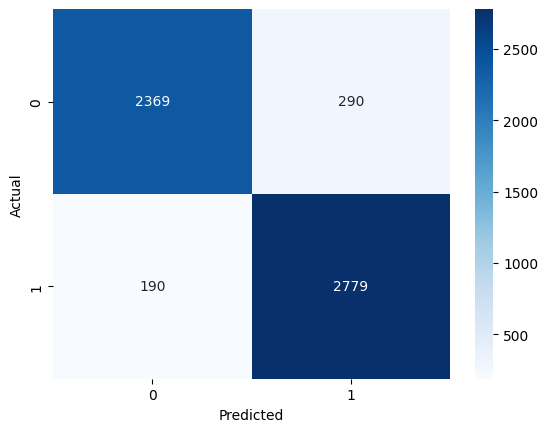

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
import joblib

joblib.dump(model, 'network_vpn_classifier.pkl')


['network_vpn_classifier.pkl']